# Using XGBoost for Demand Forecast: warehouse and product level <br>(End to End Demo)  

In [4]:
import kagglehub
import pandas as pd 
import os
# Get Data from Kaggle
path = kagglehub.dataset_download("felixzhao/productdemandforecasting")
filename = 'Historical Product Demand.csv'
filepath = os.path.join(path,filename)
df= pd.read_csv(filepath)
df.head()


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [5]:
d1 = df.copy()

In [6]:

d1['Product_Code'] = d1['Product_Code'].replace(r'^Product_', '', regex=True)
d1['Product_Category'] = d1['Product_Category'].replace(r'^Category_','',regex=True)
display(
    d1['Product_Code'].nunique(),
    d1['Product_Category'].nunique(),  
    d1['Warehouse'].nunique(),
    d1.head()
    )

2160

33

4

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,0993,Whse_J,028,2012/7/27,100
1,0979,Whse_J,028,2012/1/19,500
2,0979,Whse_J,028,2012/2/3,500
3,0979,Whse_J,028,2012/2/9,500
4,0979,Whse_J,028,2012/3/2,500


In [7]:
d1['Date'] = pd.to_datetime(d1['Date'])
d1['Order_Demand'] = pd.to_numeric(d1['Order_Demand'])
d1['Product_Code'] = pd.to_numeric(d1['Product_Code'])

ValueError: Unable to parse string "(1)" at position 112290

In [8]:
d2=d1.copy()
d1.loc[112290]

Product_Code                       2169
Warehouse                        Whse_A
Product_Category                    024
Date                2012-08-09 00:00:00
Order_Demand                        (1)
Name: 112290, dtype: object

In [9]:
d2['Order_Demand'] = d2['Order_Demand'].replace(r'\(|\)','',regex=True)



In [10]:
d2['Date'] = pd.to_datetime(d2['Date'])
d2['Order_Demand'] = pd.to_numeric(d2['Order_Demand'])
d2['Product_Code'] = pd.to_numeric(d2['Product_Code'])
display(
    d2.dtypes,
    d2.head())

Product_Code                 int64
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,993,Whse_J,028,2012-07-27,100
1,979,Whse_J,028,2012-01-19,500
2,979,Whse_J,028,2012-02-03,500
3,979,Whse_J,028,2012-02-09,500
4,979,Whse_J,028,2012-03-02,500


In [11]:
print(d2['Warehouse'].unique())

['Whse_J' 'Whse_S' 'Whse_C' 'Whse_A']


In [12]:
d2['Warehouse'] = d2['Warehouse'].str.strip()
d2['Warehouse']=d2['Warehouse'].str.extract(r'(\w)$')
d2.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,993,J,028,2012-07-27,100
1,979,J,028,2012-01-19,500
2,979,J,028,2012-02-03,500
3,979,J,028,2012-02-09,500
4,979,J,028,2012-03-02,500


In [13]:
d2['Product_Code'].nunique()

2160

In [14]:
category_counts=d2.groupby('Product_Code')['Product_Category'].nunique()

if (category_counts == 1).all():
    print("Each products have only one category.")
else:
    print("Some products have multiple categories.")


Each products have only one category.


In [15]:
d3 = d2.drop(columns = 'Product_Category')
d3.head()

,Product_Code,Warehouse,Date,Order_Demand
0,993,J,2012-07-27,100
1,979,J,2012-01-19,500
2,979,J,2012-02-03,500
3,979,J,2012-02-09,500
4,979,J,2012-03-02,500


In [16]:
Unique_count= d3.groupby('Product_Code')['Warehouse'].nunique() 
if (Unique_count == 1).all():
    print('Each products have only one warehouse')
else:
    print('Some products have multiple warehouses')

Some products have multiple warehouses


In [17]:
df_warehouse = d3.groupby(['Warehouse','Date'])['Order_Demand'].sum().reset_index()
df_warehouse.sort_values(by = ['Warehouse','Date'],inplace=True)
df_warehouse.head()

,Warehouse,Date,Order_Demand
0,A,2011-01-08,2
1,A,2011-05-31,108
2,A,2011-11-04,500
3,A,2011-11-18,4001
4,A,2011-11-21,110


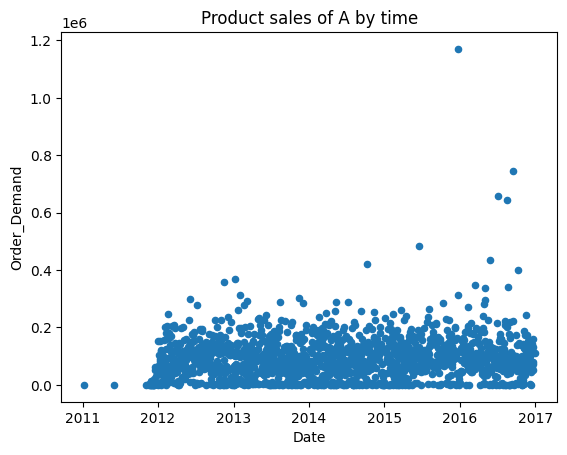

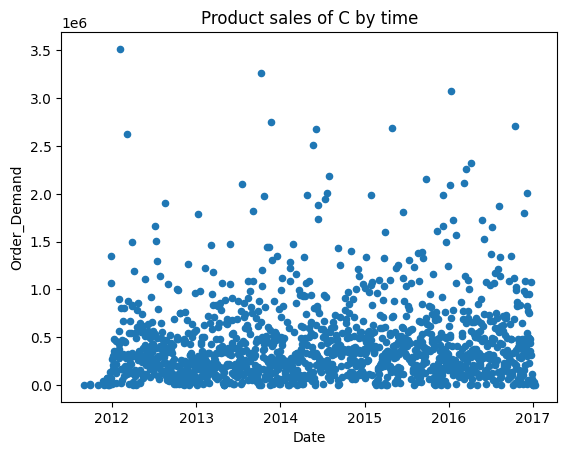

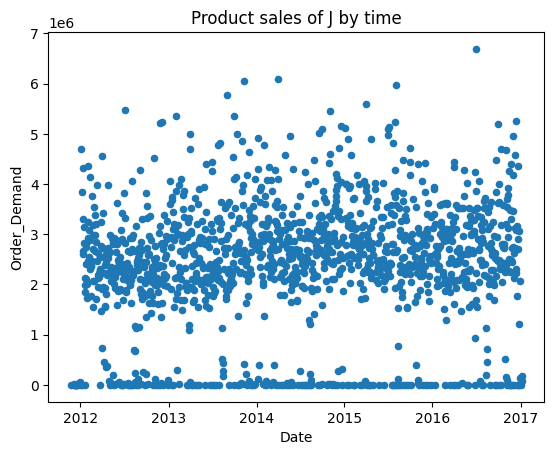

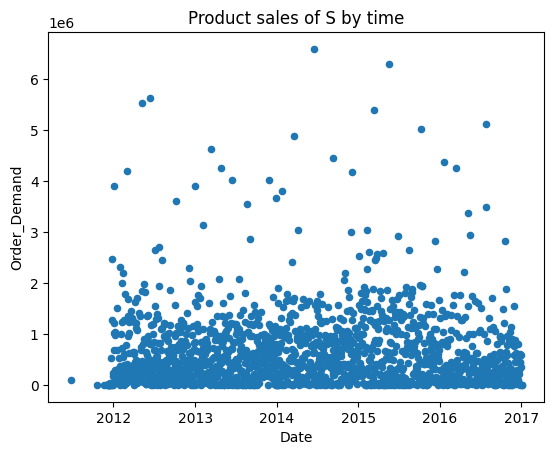

In [18]:
import matplotlib.pyplot as plt

for warehouse in df_warehouse['Warehouse'].unique():
    w = df_warehouse[df_warehouse['Warehouse'] == warehouse]
    w.plot(x='Date',y='Order_Demand',title= f'Product sales of {warehouse} by time',kind = 'scatter')

    plt.xlabel('Date')
    plt.ylabel('Order_Demand')
    plt.show()


In [19]:
d3.head()

,Product_Code,Warehouse,Date,Order_Demand
0,993,J,2012-07-27,100
1,979,J,2012-01-19,500
2,979,J,2012-02-03,500
3,979,J,2012-02-09,500
4,979,J,2012-03-02,500


Top 5 selling SKUs for J:
   Product_Code Year_Month  Order_Demand
0          1248    2012-01       3772000
1          1248    2012-02       6477000
2          1248    2012-03       4533000
3          1248    2012-04       2557000
4          1248    2012-05       3870000
Number of unique Year-Month combinations: 61


/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


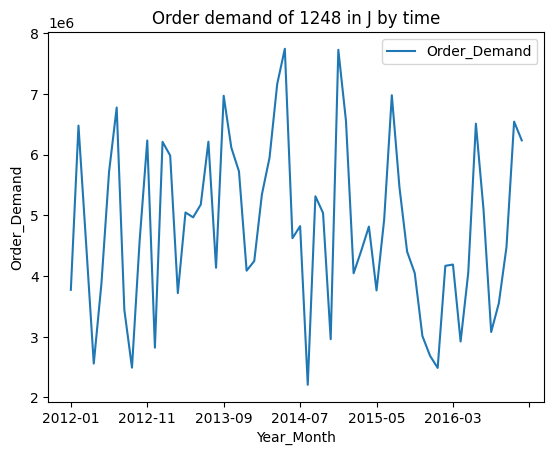

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


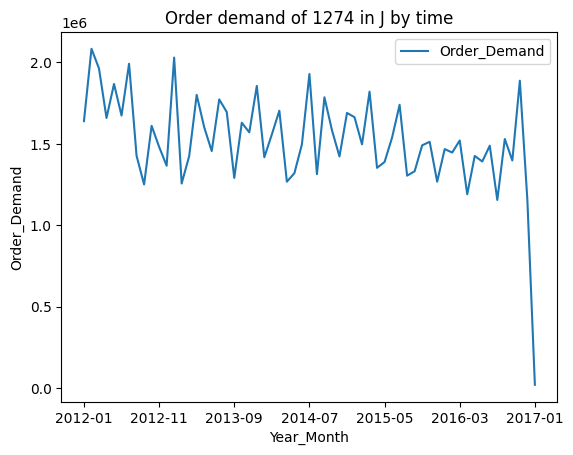

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


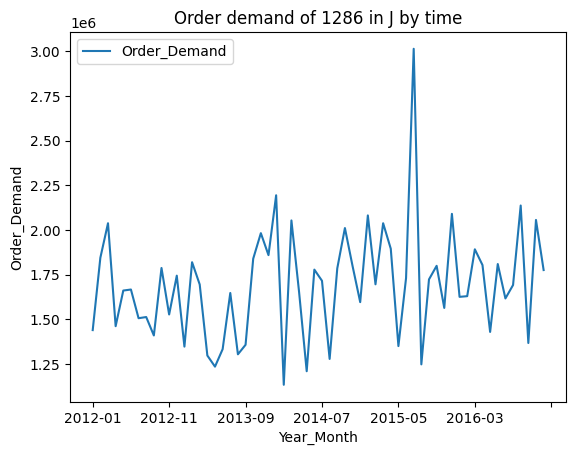

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


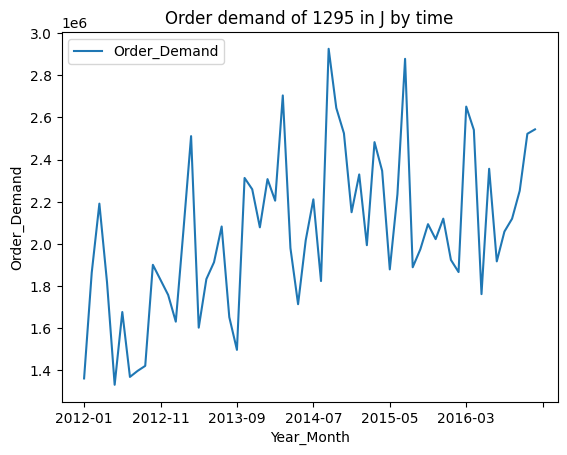

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


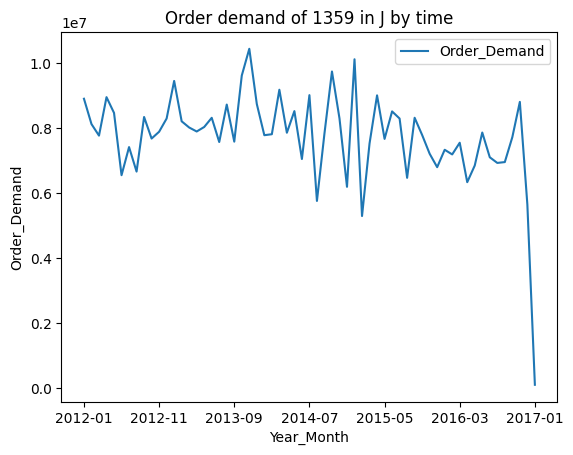

Top 5 selling SKUs for S:
   Product_Code Year_Month  Order_Demand
0            83    2012-01       2260000
1            83    2012-02       3000000
2            83    2012-03       1420000
3            83    2012-04       2250000
4            83    2012-05       1279000
Number of unique Year-Month combinations: 61


/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


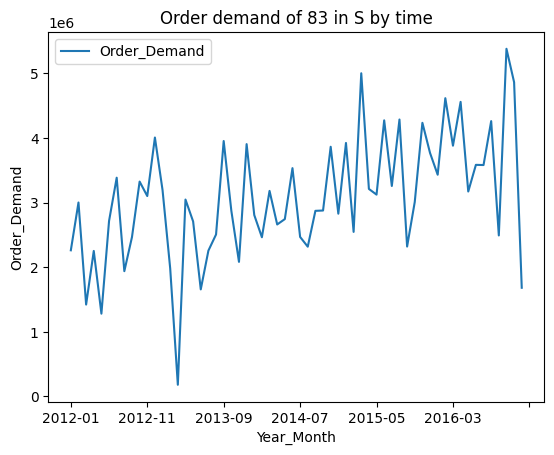

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


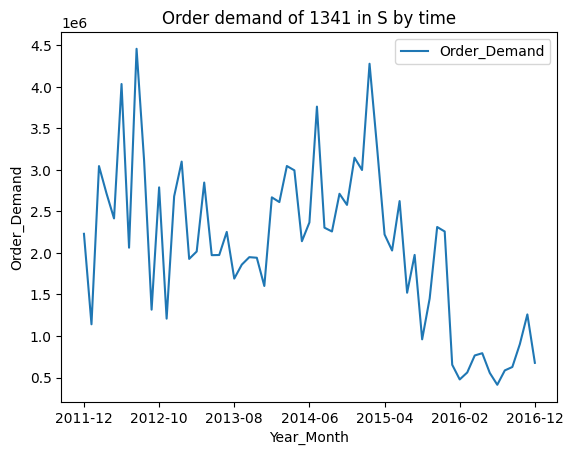

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


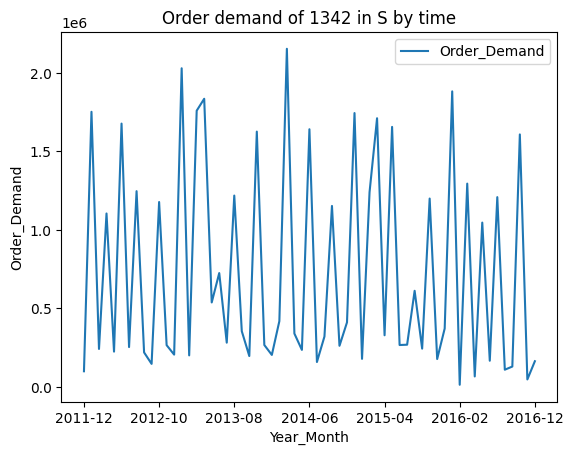

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


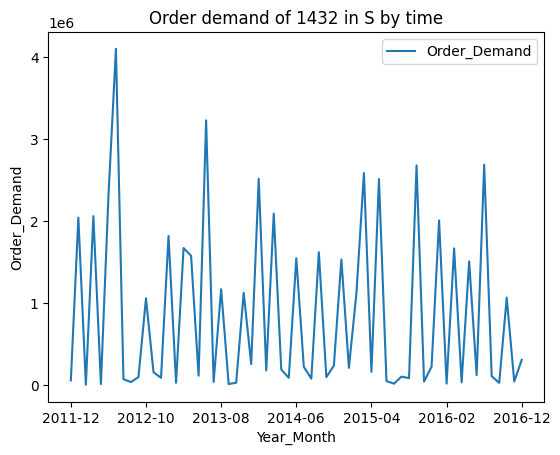

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


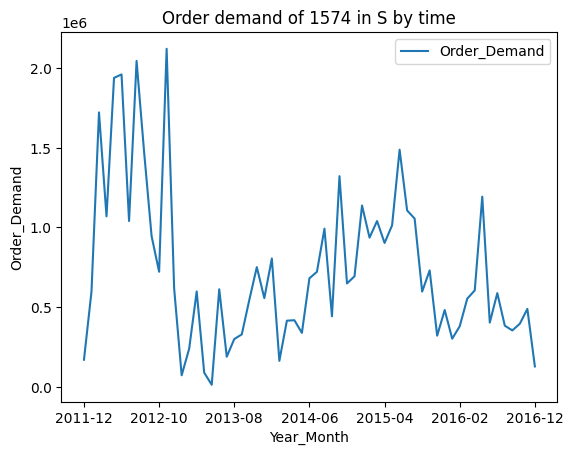

Top 5 selling SKUs for C:
   Product_Code Year_Month  Order_Demand
0          1245    2011-12        900000
1          1245    2012-01        462000
2          1245    2012-02       1380000
3          1245    2012-03       1300000
4          1245    2012-04        924000
Number of unique Year-Month combinations: 61


/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


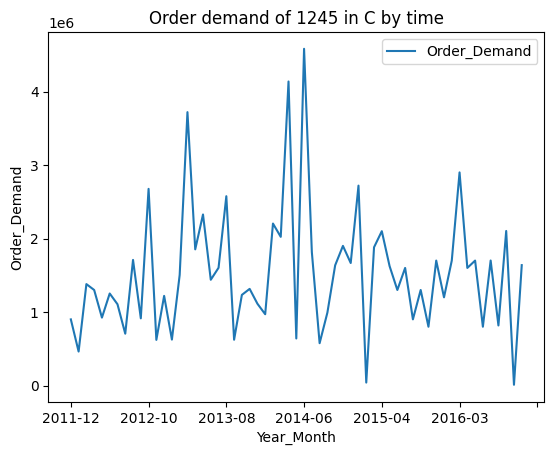

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


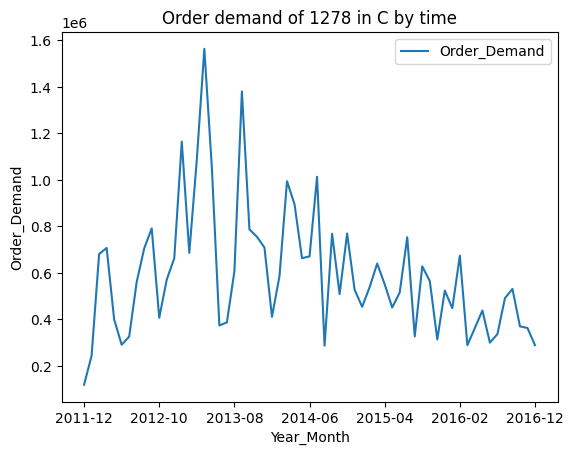

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


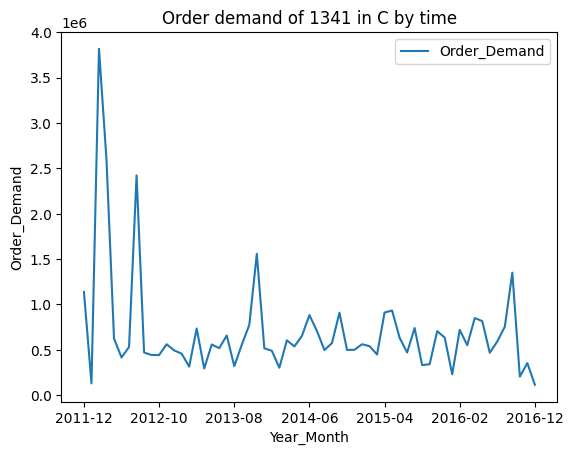

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


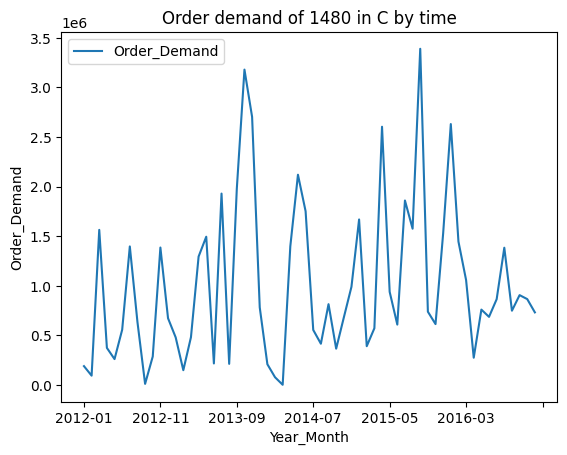

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


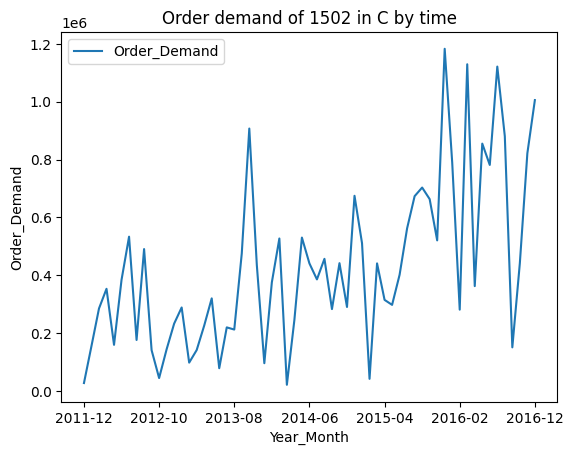

Top 5 selling SKUs for A:
   Product_Code Year_Month  Order_Demand
0           424    2012-01         40000
1           424    2012-02        141000
2           424    2012-03         37000
3           424    2012-04         65000
4           424    2012-05         58000
Number of unique Year-Month combinations: 61


/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


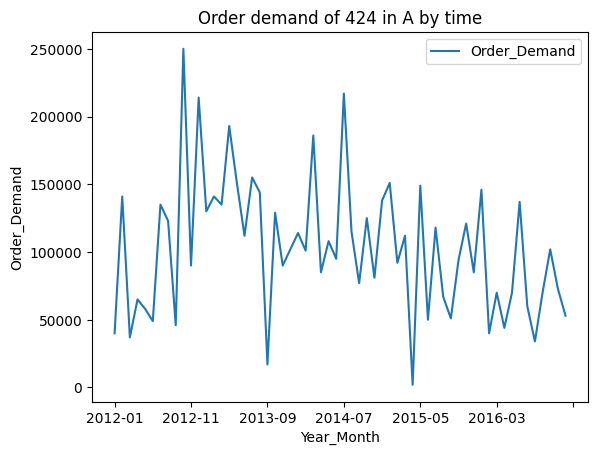

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


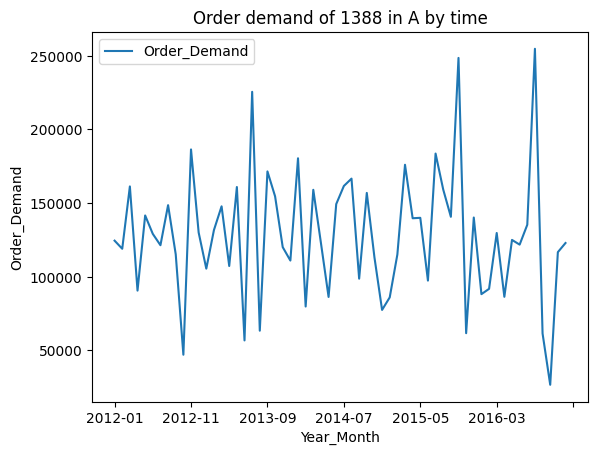

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


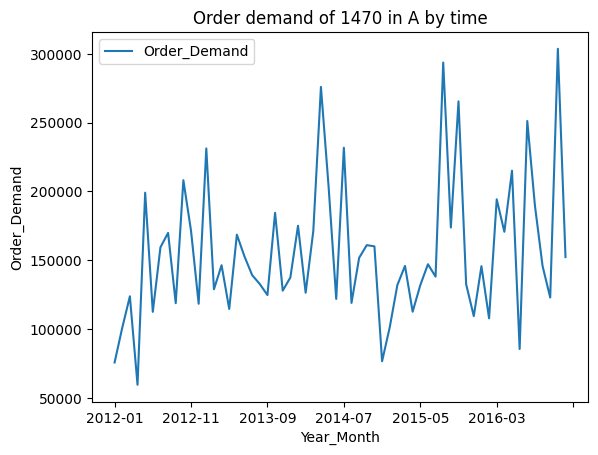

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


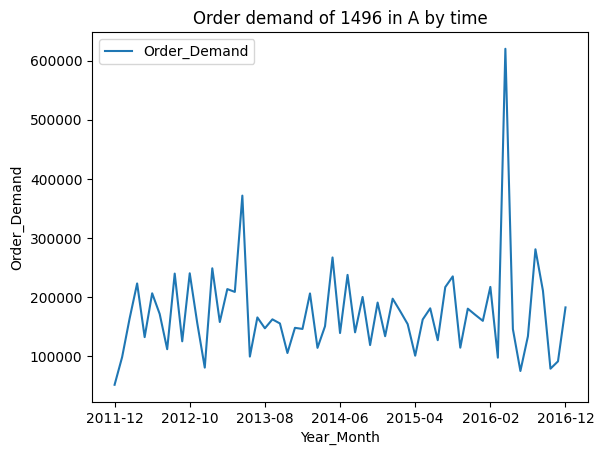

/var/folders/07/pcxs2zys4msbrvlbxq05c0380000gn/T/ipykernel_58823/1154232777.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d00['Year_Month'] = d00['Year_Month'].astype(str)


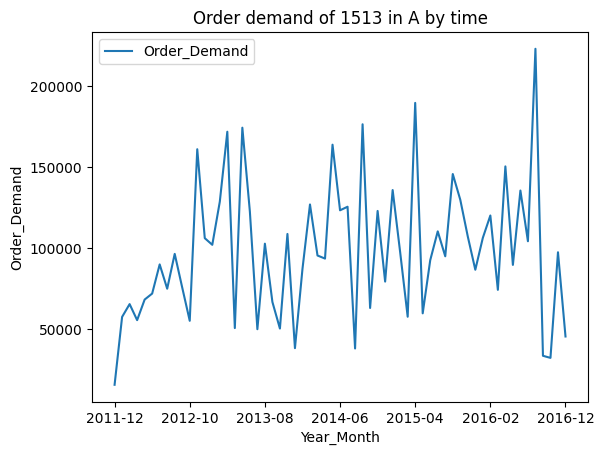

In [20]:

for Warehouse in d3['Warehouse'].unique():
    d0 = d3[d3['Warehouse']==Warehouse].sort_values(by=['Date','Order_Demand'])
    # Calculate total sales for each Product_Code within the warehouse
    top_skus = (
        d0.groupby('Product_Code')['Order_Demand']
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .index
    )
    d0 = d0[d0['Product_Code'].isin(top_skus)].sort_values(by=['Date', 'Order_Demand'])


    d0['Year_Month'] = d0['Date'].dt.to_period('M')
    d0 = d0[['Product_Code','Year_Month','Order_Demand']]
    d0 = d0.groupby(['Product_Code','Year_Month'])['Order_Demand'].sum().reset_index()

    # Display the filtered DataFrame for the current warehouse
    print(f"Top 5 selling SKUs for {Warehouse}:")
    print(d0.head())
    unique_count = d0['Year_Month'].nunique()
    print("Number of unique Year-Month combinations:", unique_count)

    for product in d0['Product_Code'].unique():
        d00 = d0[d0['Product_Code']==product]
        d00['Year_Month'] = d00['Year_Month'].astype(str)
        d00.plot(x='Year_Month', y='Order_Demand',kind='line',title=f'Order demand of {product} in {Warehouse} by time')
        plt.xlabel('Year_Month')
        plt.ylabel('Order_Demand')
        plt.show()




based on observation, the order demand of Product 1274 and 1359 at warehouse J, 1341 at warehouse C were 0 for the latest month.<br>
We will have to check with Commercial team first to see if they have been listed.<br>
For now, we will simply skip them.


the forecast accuracy of product 1248 at warehouse J is 85.39%


,Actual,Forecast,Mape
0,2485000,3792464,0.53
1,4167000,4484772,0.08
2,4188000,4450905,0.06
3,2920000,2954438,0.01
4,4052999,2754262,0.32
5,6509000,5396674,0.17
6,5091000,5962164,0.17
7,3077000,3375449,0.10
8,3550000,2741686,0.23
9,4474000,4395228,0.02


'Future Predictions of 1248 at warehouse J:'

,Date,Order_Demand_Forecast
0,2017-01-01,5836986
1,2017-02-01,6150132
2,2017-03-01,2486790
3,2017-04-01,3468097
4,2017-05-01,6162456
5,2017-06-01,6380054


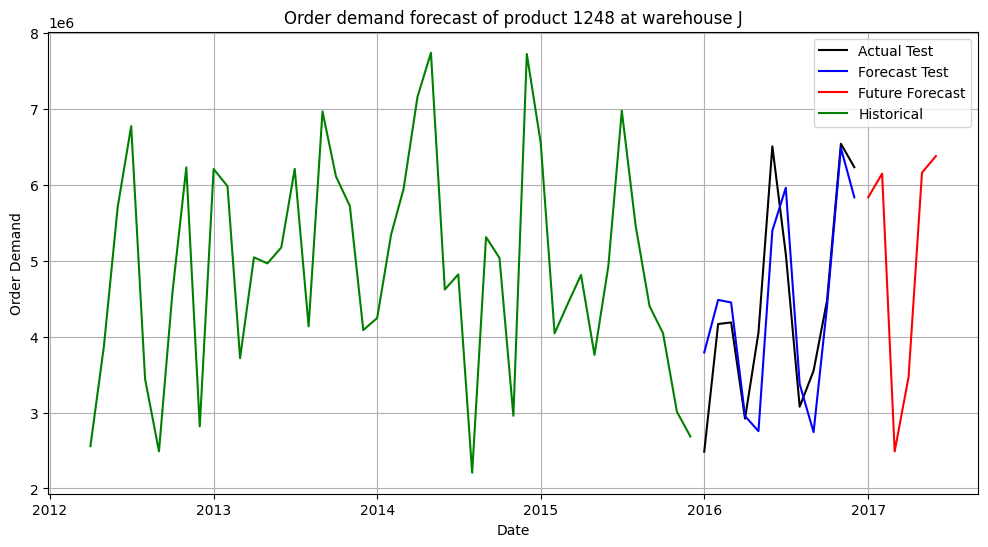

the forecast accuracy of product 1286 at warehouse J is 96.07%


,Actual,Forecast,Mape
0,1625400,1662719,0.02
1,1629200,1675422,0.03
2,1891400,1697311,0.10
3,1803400,1816487,0.01
4,1429200,1352244,0.05
5,1808900,1779945,0.02
6,1616500,1572163,0.03
7,1691500,1672929,0.01
8,2136400,2042870,0.04
9,1367200,1478406,0.08


'Future Predictions of 1286 at warehouse J:'

,Date,Order_Demand_Forecast
0,2017-01-01,1748791
1,2017-02-01,2080004
2,2017-03-01,1375935
3,2017-04-01,1136571
4,2017-05-01,1320949
5,2017-06-01,1912127


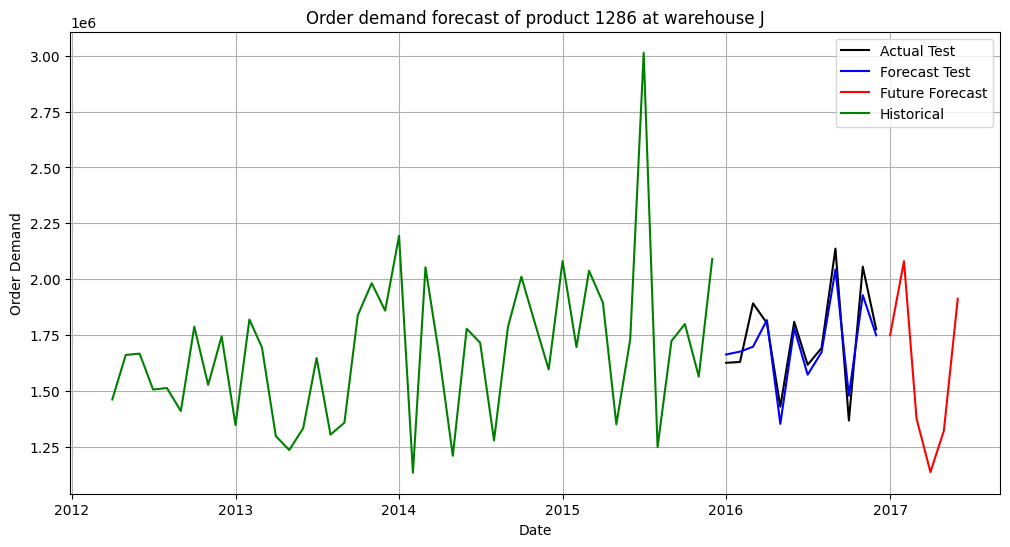

the forecast accuracy of product 1295 at warehouse J is 95.71%


,Actual,Forecast,Mape
0,1923500,1884577,0.02
1,1865900,1875600,0.01
2,2651600,2501760,0.06
3,2540700,2447049,0.04
4,1761099,1843042,0.05
5,2356300,2259653,0.04
6,1916700,1800915,0.06
7,2058200,1896544,0.08
8,2119200,2107855,0.01
9,2251900,2087035,0.07


'Future Predictions of 1295 at warehouse J:'

,Date,Order_Demand_Forecast
0,2017-01-01,2420224
1,2017-02-01,2610631
2,2017-03-01,1560701
3,2017-04-01,1712158
4,2017-05-01,2280925
5,2017-06-01,2620084


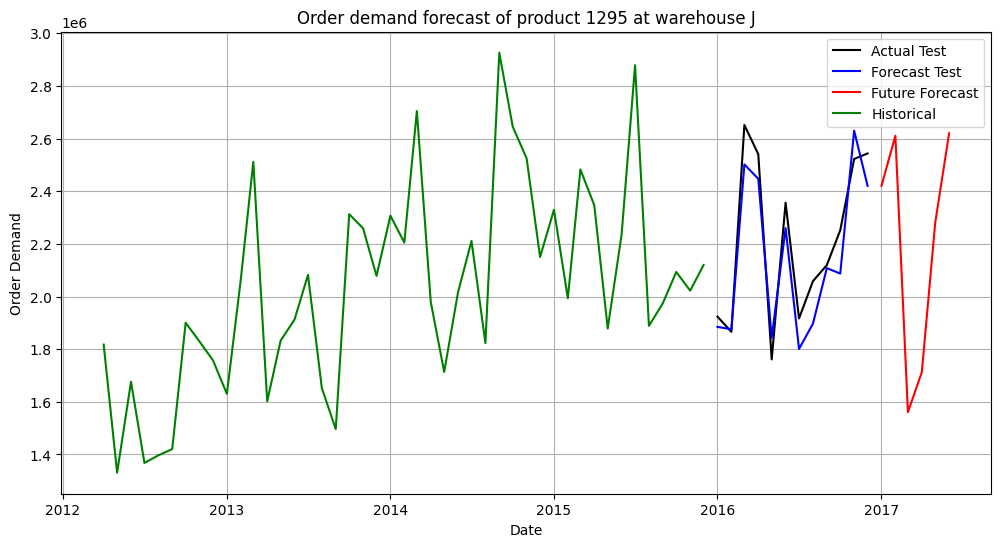

the forecast accuracy of product 83 at warehouse S is 79.22%


,Actual,Forecast,Mape
0,3430000,3061682,0.11
1,4615000,3627124,0.21
2,3880000,3392212,0.13
3,4558000,3628973,0.20
4,3170000,3392211,0.07
5,3583000,3560154,0.01
6,3579999,3006038,0.16
7,4260000,3445650,0.19
8,2490000,2942849,0.18
9,5379999,4991012,0.07


'Future Predictions of 83 at warehouse S:'

,Date,Order_Demand_Forecast
0,2017-01-01,3137224
1,2017-02-01,3661729
2,2017-03-01,4311974
3,2017-04-01,4157605
4,2017-05-01,3102257
5,2017-06-01,3071911


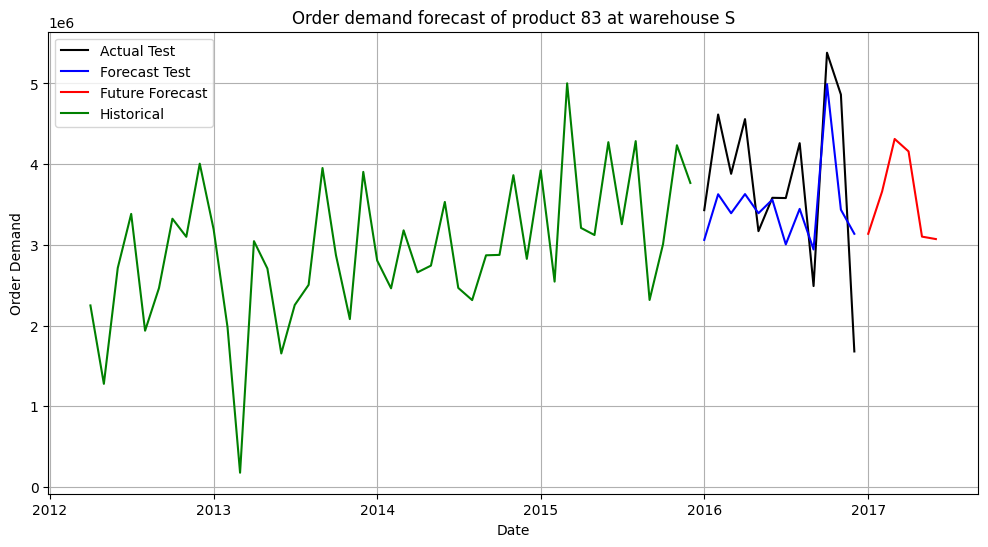

the forecast accuracy of product 1341 at warehouse S is -127.57%


,Actual,Forecast,Mape
0,654000,1164244,0.78
1,477000,1599059,2.35
2,561000,2263711,3.04
3,766000,2263711,1.96
4,793000,2263711,1.85
5,556000,2263711,3.07
6,413000,2263711,4.48
7,586000,2263711,2.86
8,627000,2263711,2.61
9,902000,2263711,1.51


'Future Predictions of 1341 at warehouse S:'

,Date,Order_Demand_Forecast
0,2017-01-01,2025024
1,2017-02-01,2273072
2,2017-03-01,2378729
3,2017-04-01,2378729
4,2017-05-01,2464754
5,2017-06-01,2481123


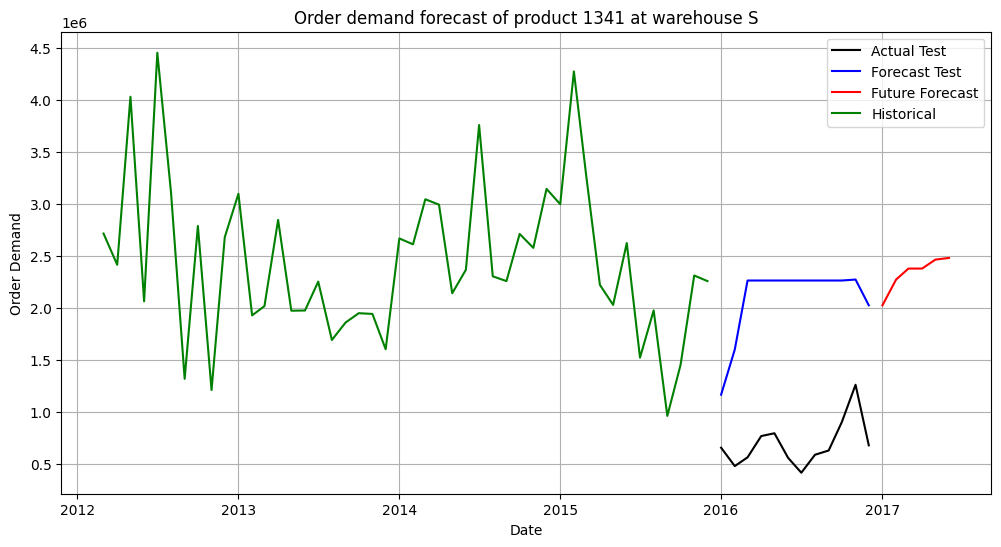

the forecast accuracy of product 1342 at warehouse S is -119.37%


,Actual,Forecast,Mape
0,1881000,1696572,0.10
1,14000,194511,12.89
2,1294000,857768,0.34
3,67000,252341,2.77
4,1046000,754377,0.28
5,167000,255094,0.53
6,1208000,1219845,0.01
7,110000,225230,1.05
8,130000,503195,2.87
9,1607000,1261915,0.21


'Future Predictions of 1342 at warehouse S:'

,Date,Order_Demand_Forecast
0,2017-01-01,454874
1,2017-02-01,333063
2,2017-03-01,838503
3,2017-04-01,1397722
4,2017-05-01,224686
5,2017-06-01,702210


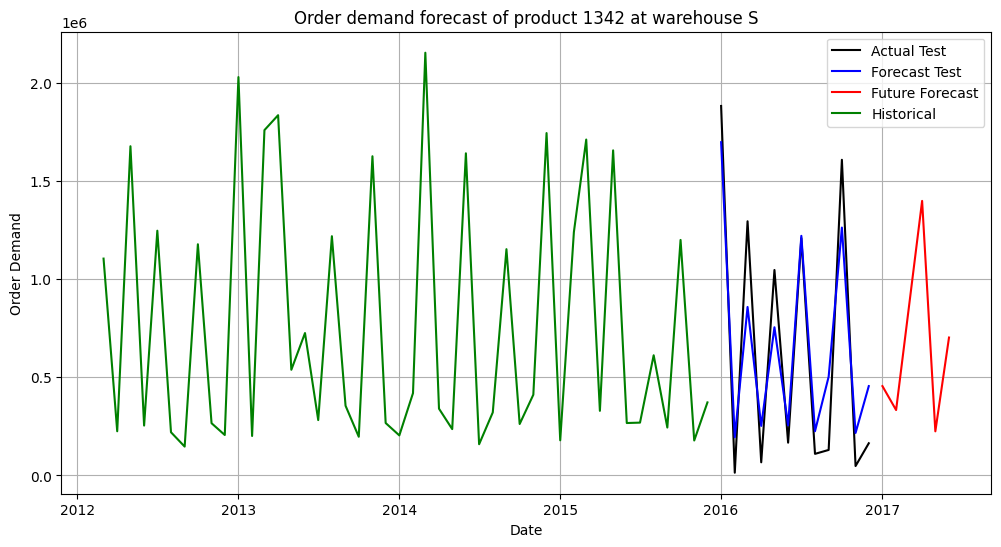

the forecast accuracy of product 1432 at warehouse S is -87.89%


,Actual,Forecast,Mape
0,2012000,1265200,0.37
1,21000,97477,3.64
2,1670000,1450571,0.13
3,37000,320453,7.66
4,1512000,1820686,0.20
5,124999,315551,1.52
6,2692000,2692583,0.00
7,111999,161774,0.44
8,30000,117123,2.90
9,1070000,559417,0.48


'Future Predictions of 1432 at warehouse S:'

,Date,Order_Demand_Forecast
0,2017-01-01,651735
1,2017-02-01,163613
2,2017-03-01,227330
3,2017-04-01,693196
4,2017-05-01,166001
5,2017-06-01,162612


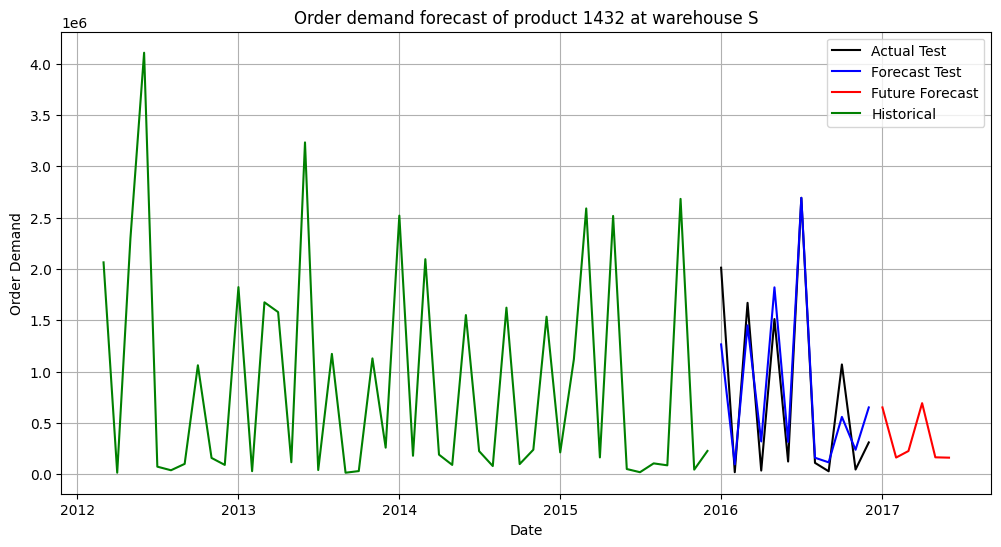

the forecast accuracy of product 1574 at warehouse S is 80.37%


,Actual,Forecast,Mape
0,302000,268171,0.11
1,380000,336449,0.11
2,553000,427421,0.23
3,605000,589259,0.03
4,1193000,1279610,0.07
5,403000,489165,0.21
6,588000,459642,0.22
7,383500,409198,0.07
8,354000,337635,0.05
9,396000,333619,0.16


'Future Predictions of 1574 at warehouse S:'

,Date,Order_Demand_Forecast
0,2017-01-01,266254
1,2017-02-01,432925
2,2017-03-01,441304
3,2017-04-01,331143
4,2017-05-01,439866
5,2017-06-01,365783


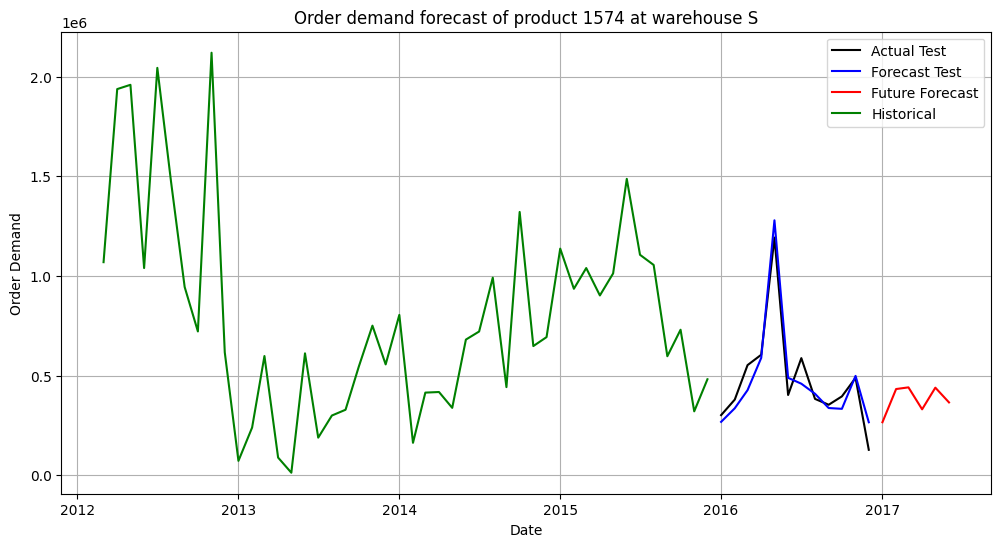

the forecast accuracy of product 424 at warehouse A is 86.13%


,Actual,Forecast,Mape
0,146000,136618,0.06
1,40000,45374,0.13
2,70000,72099,0.03
3,44000,46172,0.05
4,70000,63296,0.10
5,137000,133317,0.03
6,60000,63274,0.05
7,34000,50067,0.47
8,70000,68758,0.02
9,102000,87776,0.14


'Future Predictions of 424 at warehouse A:'

,Date,Order_Demand_Forecast
0,2017-01-01,60290
1,2017-02-01,51856
2,2017-03-01,47154
3,2017-04-01,92373
4,2017-05-01,104340
5,2017-06-01,80478


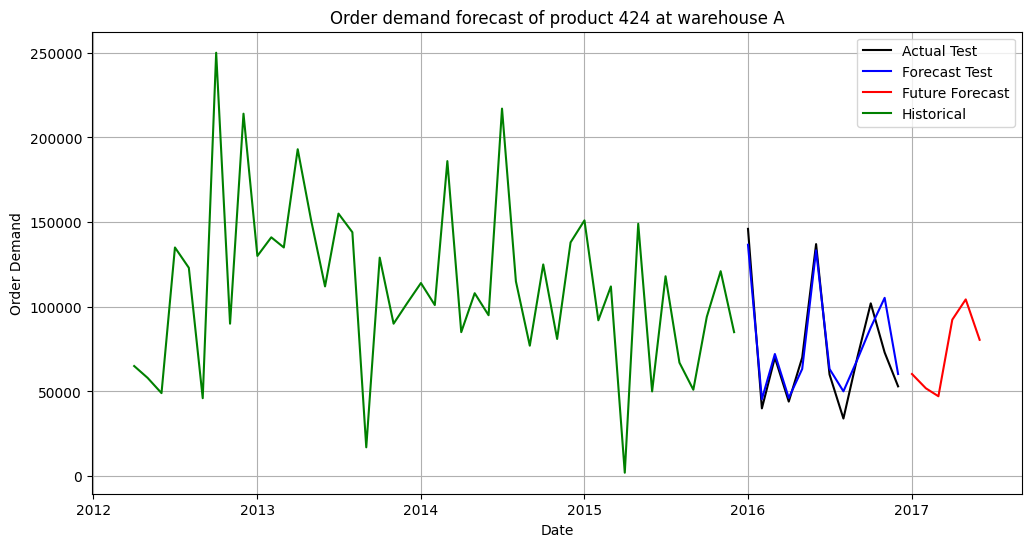

the forecast accuracy of product 1388 at warehouse A is 40.77%


,Actual,Forecast,Mape
0,88200,65661,0.26
1,91800,76181,0.17
2,129700,62219,0.52
3,86400,77873,0.10
4,125000,78646,0.37
5,121800,64317,0.47
6,135300,118353,0.13
7,254700,247197,0.03
8,61500,107199,0.74
9,26700,130861,3.90


'Future Predictions of 1388 at warehouse A:'

,Date,Order_Demand_Forecast
0,2017-01-01,83765
1,2017-02-01,104721
2,2017-03-01,121735
3,2017-04-01,78949
4,2017-05-01,83755
5,2017-06-01,121735


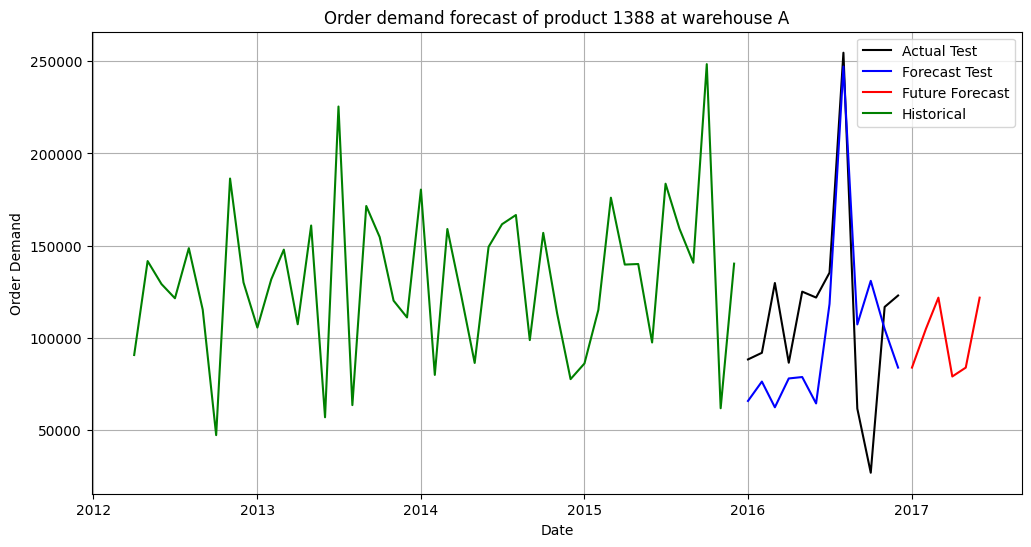

the forecast accuracy of product 1470 at warehouse A is 90.59%


,Actual,Forecast,Mape
0,145600,130615,0.10
1,107700,106667,0.01
2,194199,198277,0.02
3,170600,162413,0.05
4,215000,192910,0.10
5,85400,117503,0.38
6,251100,249405,0.01
7,189599,187544,0.01
8,145700,152522,0.05
9,122800,133188,0.08


'Future Predictions of 1470 at warehouse A:'

,Date,Order_Demand_Forecast
0,2017-01-01,173768
1,2017-02-01,249405
2,2017-03-01,173270
3,2017-04-01,184235
4,2017-05-01,122316
5,2017-06-01,131469


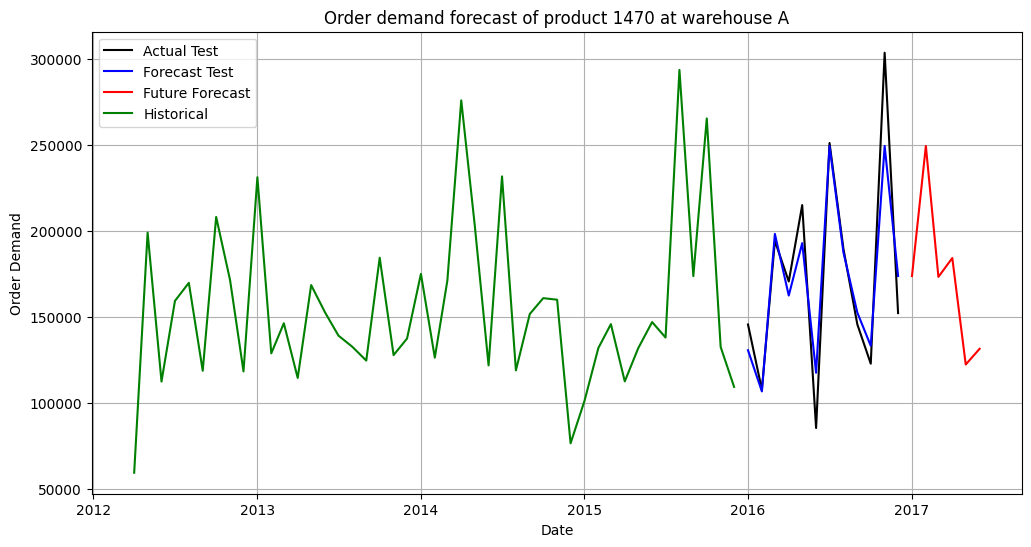

the forecast accuracy of product 1496 at warehouse A is 60.17%


,Actual,Forecast,Mape
0,159599,162650,0.02
1,217000,206608,0.05
2,97300,116577,0.20
3,619850,370756,0.40
4,145650,318968,1.19
5,74750,149194,1.00
6,133550,149305,0.12
7,280650,262976,0.06
8,210500,148899,0.29
9,78650,141192,0.80


'Future Predictions of 1496 at warehouse A:'

,Date,Order_Demand_Forecast
0,2017-01-01,170530
1,2017-02-01,159182
2,2017-03-01,106705
3,2017-04-01,134225
4,2017-05-01,157525
5,2017-06-01,102820


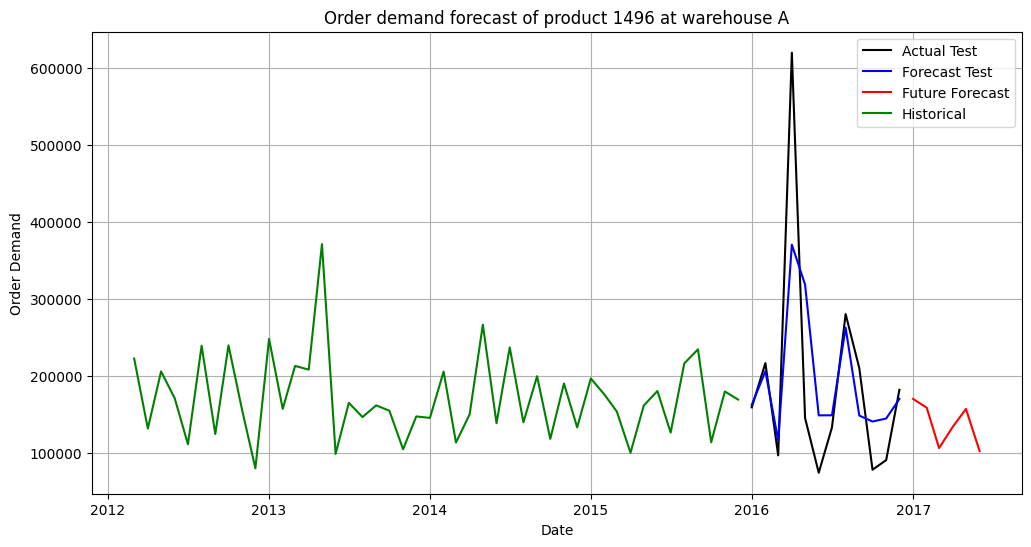

the forecast accuracy of product 1513 at warehouse A is 62.01%


,Actual,Forecast,Mape
0,106100,91216,0.14
1,119900,106066,0.12
2,74000,71864,0.03
3,150200,164406,0.09
4,89400,63136,0.29
5,135300,143396,0.06
6,104000,108932,0.05
7,222800,93036,0.58
8,33300,67063,1.01
9,31999,85837,1.68


'Future Predictions of 1513 at warehouse A:'

,Date,Order_Demand_Forecast
0,2017-01-01,62291
1,2017-02-01,84057
2,2017-03-01,85401
3,2017-04-01,56121
4,2017-05-01,86477
5,2017-06-01,50969


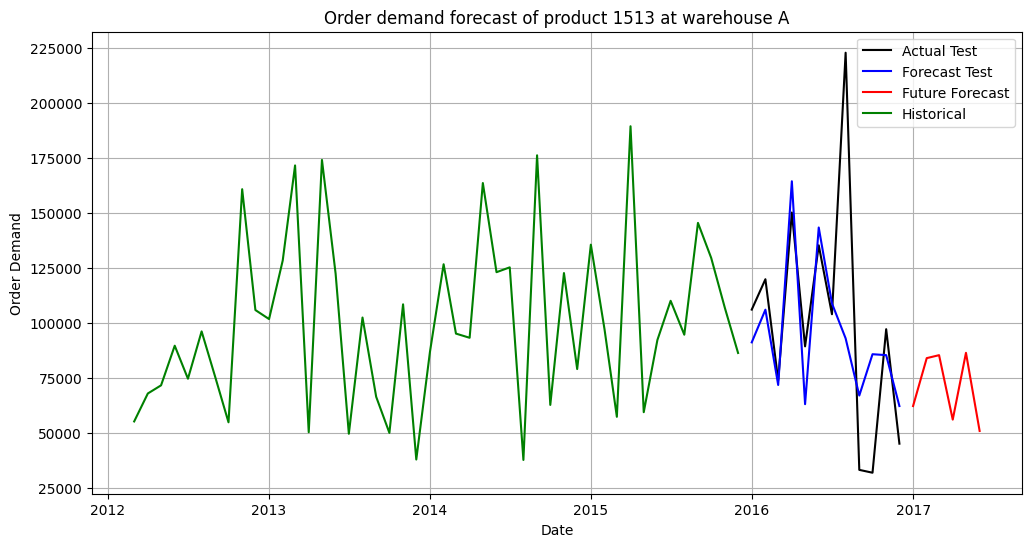

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

for Warehouse in d3['Warehouse'].unique():
    d0 = d3[d3['Warehouse'] == Warehouse].sort_values(by=['Date', 'Order_Demand'])
    
    # Calculate total sales for each Product_Code within the warehouse
    top_skus = (
        d0.groupby('Product_Code')['Order_Demand']
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .index
    )
    d0 = d0[d0['Product_Code'].isin(top_skus)].sort_values(by=['Date', 'Order_Demand'])

    d0['Year_Month'] = d0['Date'].dt.to_period('M')
    d0 = d0[['Product_Code', 'Year_Month', 'Order_Demand']]
    d0 = d0.groupby(['Product_Code', 'Year_Month'])['Order_Demand'].sum().reset_index()

    if Warehouse == 'J': 
        d0 = d0[~d0['Product_Code'].isin([1274, 1359])]
    if Warehouse == 'C': 
        d0 = d0[~d0['Product_Code'] == 1341]
    
    for product in d0['Product_Code'].unique():
        d00 = d0[d0['Product_Code'] == product].copy()
        
        # Preprocess data for XGB
        d00.loc[:,'Year_Month'] = pd.to_datetime(d00['Year_Month'].astype(str) + '-01')

        #inset lag features
        d00['lag_1'] = d00['Order_Demand'].shift(1)
        d00['lag_2'] = d00['Order_Demand'].shift(2)
        d00['lag_3'] = d00['Order_Demand'].shift(3)

        d00['rolling_mean_2'] = d00['Order_Demand'].rolling(window=2).mean()
        d00['rolling_mean_3'] = d00['Order_Demand'].rolling(window=3).mean()
        d00['rolling_std_2'] = d00['Order_Demand'].rolling(window=2).std()
        d00['rolling_std_3'] = d00['Order_Demand'].rolling(window=3).std()

        #Drop rows with NaN values
        d00 = d00[3:].reset_index(drop=True)
        d00 = d00.sort_values(by='Year_Month')
        y = d00['Order_Demand']
        X = d00.iloc[:, 3:]
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)
        y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

        # Split data into train and test sets
        X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,train_size=0.8,shuffle=False)

        model = XGBRegressor()
        model.fit(X_train,y_train)
        y_test_predicted = model.predict(X_test) 
        comparison_df = {}
        comparison_actual = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()
        comparison_forecast = scaler.inverse_transform(y_test_predicted.reshape(-1,1)).flatten()
        comparison_mape = abs(comparison_forecast -comparison_actual)/comparison_actual
        comparison_df = pd.DataFrame({
            'Actual':comparison_actual,
            'Forecast':comparison_forecast,
            'Mape': comparison_mape
        })
       
        # Explicitly assign the integer conversion to the columns
        comparison_df['Actual'] = comparison_df['Actual'].astype(int)
        comparison_df['Forecast'] = comparison_df['Forecast'].astype(int)
        comparison_df['Mape'] = comparison_df['Mape'].round(2)
        MAPE = comparison_mape.mean().round(4)
        print(f'the forecast accuracy of product {product} at warehouse {Warehouse} is {(1-MAPE)*100:.2f}%')
        display(comparison_df)

        #Now let's predict future order demand
        import numpy as np
        def update_features_with_new_prediction(last_known_features, prediction):
            # This function updates the feature vector by removing the oldest value and appending the new predicted value
            new_feature_vector = np.append(last_known_features[0, 1:], prediction)  # Remove the first feature and add the prediction
            return new_feature_vector.reshape(1, -1)

        # 1. Get the last available data point from X_test or the training set as input for future forecasting
        last_known_data_point = X_test[-1, :].reshape(1, -1)  # Take the last row from X_test

        # 2. Predict the first value for the future
        future_predictions_df = []
        last_date = d00.iloc[-1]['Year_Month']
        for i in range(6):  
            predicted_value = model.predict(last_known_data_point)  # Predict the next time step
            predicted_value_transformed = scaler.inverse_transform(predicted_value.reshape(-1,1)).flatten()[0].astype(int)
            last_known_data_point = update_features_with_new_prediction(last_known_data_point, predicted_value)
            
            forecast_date = last_date + pd.DateOffset(months=i+1)
            future_predictions_df.append({
                'Date': forecast_date,
                'Order_Demand_Forecast':predicted_value_transformed
            }) 
        future_predictions_df = pd.DataFrame(future_predictions_df)

        display(f"Future Predictions of {product} at warehouse {Warehouse}:",
                future_predictions_df)
        # Prepare historical data
        historical_data = d00[['Year_Month', 'Order_Demand']].copy()
        historical_data.rename(columns={'Year_Month': 'Date'}, inplace=True)
        historical_data['Type'] = 'Historical'

        # Prepare test data (actual and forecast)
        test_dates = historical_data.iloc[-len(y_test):]['Date'].values
        test_data = pd.DataFrame({
            'Date': test_dates,
            'Order_Demand': scaler.inverse_transform(y_test.reshape(-1, 1)).flatten(),
            'Type': 'Actual Test'
        })
        test_forecast_data = pd.DataFrame({
            'Date': test_dates,
            'Order_Demand': comparison_df['Forecast'],
            'Type': 'Forecast Test'
        })

        # Prepare future forecast data
        future_forecast = future_predictions_df.rename(columns={'Order_Demand_Forecast': 'Order_Demand'})
        future_forecast['Type'] = 'Future Forecast'

        # Combine all data
        combined_data = pd.concat([historical_data.iloc[:-len(y_test)], test_data, test_forecast_data, future_forecast])

        # Ensure Date is sorted for proper plotting
        combined_data.sort_values(by='Date', inplace=True)

        # Plot
        plt.figure(figsize=(12, 6))
        # Define custom colors for each type
        color_map = {
            'Historical': 'green',
            'Actual Test': 'black',
            'Forecast Test': 'blue',
            'Future Forecast': 'red'
}
        for label, group in combined_data.groupby('Type'):
            plt.plot(group['Date'], group['Order_Demand'], label=label,color=color_map[label])

        # Add labels, title, and legend
        plt.xlabel('Date')
        plt.ylabel('Order Demand')
        plt.title(f'Order demand forecast of product {product} at warehouse {Warehouse}')
        plt.legend()
        plt.grid(True)
        plt.show()
